## Configuração do Notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline

import logging, io, json, warnings

def print_json(o):
    print(json.dumps(o, indent=2))

import sys
python = sys.executable

!{python} -m pip install -U rasa_core==0.9.6 rasa_nlu[spacy]===0.12.3;
!pip install keras==2.2.4

## NLU - Natural Language Understanding


É um campo de NLP que visa transformar texto em forma livre em dados estruturados.

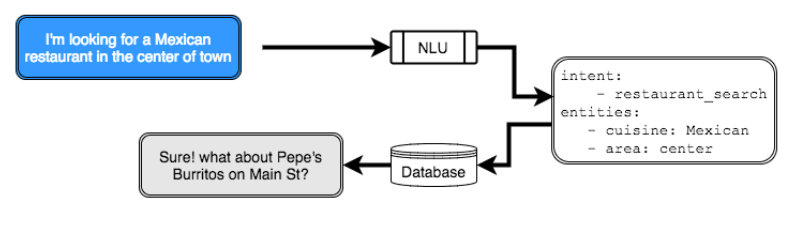

Nesse exemplo o modelo de NLU traduz a frase em dois principais tópicos: A intenção e as principais entidades do texto. 

- Intenção:
 - Encontrar um restaurante
- Entidades:
    - Culinária mexicana
    - Região central

Após identificar esses tópicos o modelo tem informações suficientes executar uma ação Ex: consultar um banco de dados, realizar uma chamada de uma api.

### Intenção

Uma intenção pode ser descrita de diversas formas, retornando no exemplo anterior: há mais de uma maneira de expressar a busca por um restaurante.

- Estou com fome
- Mostre-me boas pizzarias
- Quero levar minha namorada no sushi

O problema de identificar uma intenção em uma frase é tarefa de classificação, ou seja, dada uma frase "Qual é intenção do usuário?". No contexto de chat bots as intenções tem um escopo mais fechado, então é fácil de definir-las.

#### Exemplo 
*Quando será o próximos PS do Grupo Turing?* <br/>
- Intenção: informação_processo_seletivo


### Entidades

São entidades que representam o que o usuário fala para auxiliar na buscar.

> Reserve uma mesa para 10 de Junho, em um restaurante Chines de São Paulo.

Para identificar a principais entidades de um texto podemos utilizar algoritmos de NER (Named Entity Recognition), que visam encontrar entidades como cidades, dinheiro, data.

Para encontrar entidades identificar entidades podemos utilizar os modelos pre treiandos do spacy

#### Exemplos
*Sábado haverá evento no Instagram do Grupo Turing?*
- Intenção: informação_eventos
- Entidades: 
 - Data: Sábado
 - Rede Social: Instagram

*Estou indo da poli para o Inova*
- Intenção: movimentação
- Entidade
 - Origem: Poli
 - Destino: Inova


## RASA NLU

Lib de compreensão de linguagem natural, construída em cima da spacy, sklearn e keras, é feita para suportar tarefas específicas de chatbots. Através dela podemos treinar modelos que compreensão de texto.

Ela aceita os seguintes tipos de arquivos para treinamento: json, md, yml.

#### Intenção

Para o reconhecimento de intenção a lib utiliza word vector e o SVC (sklearn)

#### Entidades

Ela utiliza o reconhecimento de entidades do spacy

## Treinando modelo

O Rasa NLU aceita datasets em markdown (achei muuito esquisito)

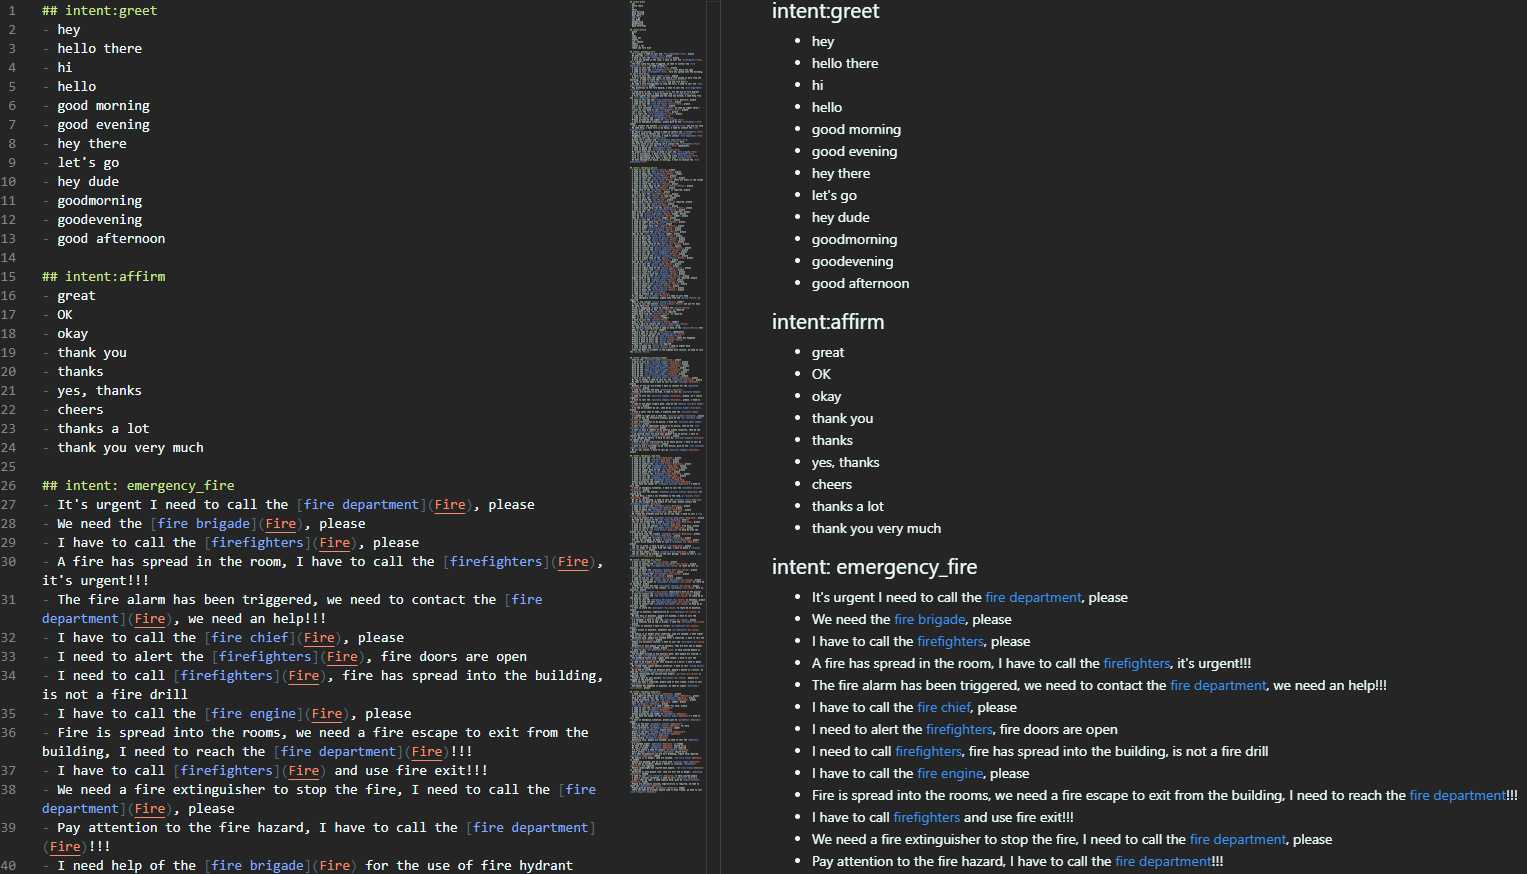

E para especificar os paraemtros do modelo podemos passar um arquivo yml, que especifica o pipeline do spcy que utilizaremos

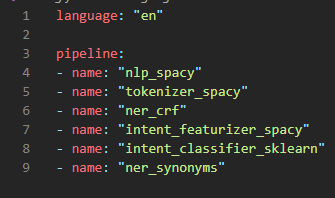

## Carregando Dataset

In [ ]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# Carregando dataset
training_data = load_data("nlu.md")

# Atributos do objeto de dataset do Rasa NLU
dir(training_data)

['MIN_EXAMPLES_PER_ENTITY',
 'MIN_EXAMPLES_PER_INTENT',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_lazy_entities',
 '_lazy_entity_examples',
 '_lazy_examples_per_entity',
 '_lazy_examples_per_intent',
 '_lazy_intent_examples',
 '_lazy_intents',
 'as_json',
 'as_markdown',
 'entities',
 'entity_examples',
 'entity_synonyms',
 'examples_per_entity',
 'examples_per_intent',
 'intent_examples',
 'intents',
 'merge',
 'persist',
 'print_stats',
 'regex_features',
 'sanitize_examples',
 'sort_regex_features',
 'sorted_entities',
 'sorted_intent_examples',
 'training_examples',
 'validate']

In [ ]:
# instanciando o modelo (lingugem e pipeline do spacy)
trainer = Trainer(config.load("config.yml"))

# Treinando o modelo
interpreter = trainer.train(training_data)

model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarning: Passing (type, 1) or 

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.4s finished


In [ ]:
print_json(interpreter.parse("Hello"))

{
  "intent": {
    "name": "greet",
    "confidence": 0.8514511366918556
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "greet",
      "confidence": 0.8514511366918556
    },
    {
      "name": "affirm",
      "confidence": 0.1203088102910365
    },
    {
      "name": "emergency_fire",
      "confidence": 0.007401816097969806
    },
    {
      "name": "emergency_police",
      "confidence": 0.00533767277608346
    },
    {
      "name": "emergency_ambulance",
      "confidence": 0.005333993649481418
    },
    {
      "name": "emergency_air_rescue",
      "confidence": 0.004527448241509809
    },
    {
      "name": "emergency_insurance_number",
      "confidence": 0.004478267582272362
    },
    {
      "name": "emergency_road_help",
      "confidence": 0.0011608546697913045
    }
  ],
  "text": "Hello"
}


In [ ]:
print_json(interpreter.parse("Where is the closest police station? I need help!!!"))

{
  "intent": {
    "name": "emergency_fire",
    "confidence": 0.3676516627757316
  },
  "entities": [
    {
      "start": 21,
      "end": 35,
      "value": "police station",
      "entity": "Police",
      "confidence": 0.8676857059726897,
      "extractor": "ner_crf"
    }
  ],
  "intent_ranking": [
    {
      "name": "emergency_fire",
      "confidence": 0.3676516627757316
    },
    {
      "name": "emergency_insurance_number",
      "confidence": 0.29262431772932573
    },
    {
      "name": "emergency_police",
      "confidence": 0.21974606158236057
    },
    {
      "name": "emergency_road_help",
      "confidence": 0.04852407967423634
    },
    {
      "name": "emergency_ambulance",
      "confidence": 0.03541317371889598
    },
    {
      "name": "affirm",
      "confidence": 0.014585021653730438
    },
    {
      "name": "emergency_air_rescue",
      "confidence": 0.011384321792371565
    },
    {
      "name": "greet",
      "confidence": 0.010071361073347359
    }

Explica o evaluation do rasa nlu

/usr/local/lib/python3.6/dist-packages/rasa_nlu/extractors/entity_synonyms.py:85: UserWarning: Failed to load synonyms file from '/content/drive/Shared drives/Grupo Turing/P&D/Áreas de Foco/NLP/Materiais/Aulas 2020/Aula de chatbots/datasets/./models/nlu/default/current/entity_synonyms.json'
  "".format(entity_synonyms_file))


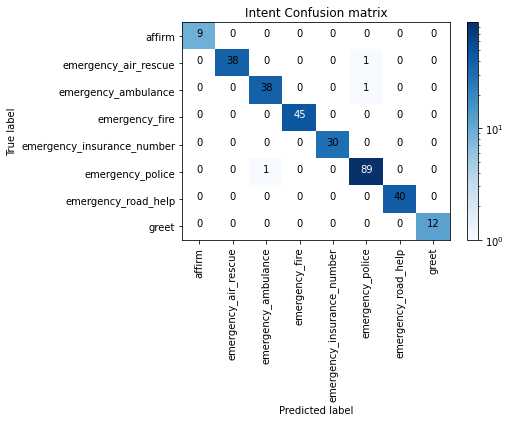

In [ ]:
from rasa_nlu.evaluate import run_evaluation

run_evaluation("nlu.md", model_directory)

# Bot mais complexos

Nesta parte do notebook iremos abordar como é realizada uma conversação continuada com um bot.

Para treinar um modelo assim, você deve construir os caminhos de conversa que um bot pode percorrer com um usuário.

** Mostrar dataset **

In [ ]:
from IPython.display import Image
from rasa_core.agent import Agent


agent = Agent('domain.yml')
agent.visualize("stories.md", output_file="story_graph.png", max_history=10)
Image(filename="story_graph.png")

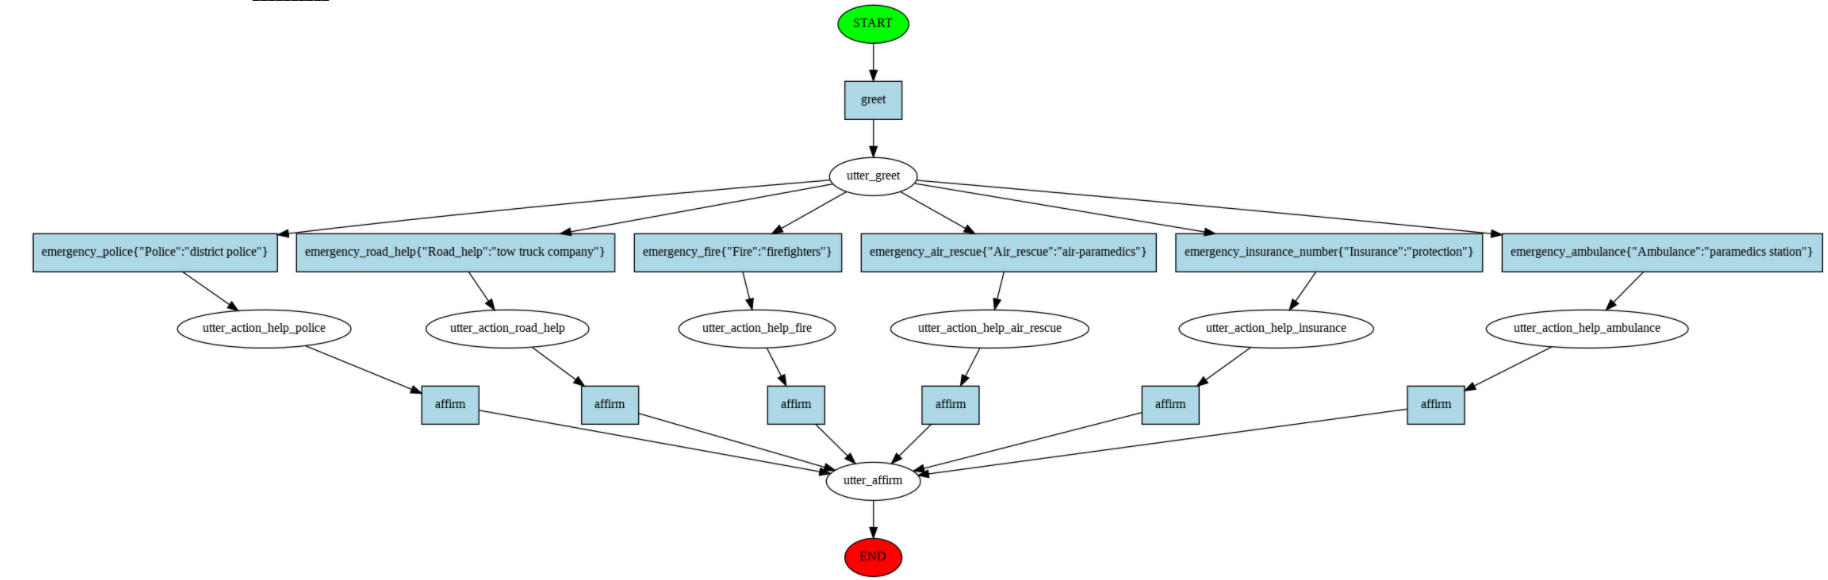

In [ ]:
from rasa_core.actions import Action
from rasa_core.events import SlotSet
from IPython.core.display import Image, display

import requests

class ApiAction(Action):
    def name(self):
        return "action_get_help"

    def run(self, dispatcher, tracker, domain):
        
        group = tracker.get_slot('Ambulance','Insurance','Fire','Police','Air_rescue','Road_help')
        
        r = requests.get('http://shibe.online/api/{}?count=1&urls=true&httpsUrls=true'.format(group))
        response = r.content.decode()
        response = response.replace('["',"")
        response = response.replace('"]',"")

In [ ]:
from rasa_core.policies import KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy()])

training_data = agent.load_data('stories.md')

agent.train(
    training_data,
    validation_split=0.1,
    epochs=50
)

Processed trackers:  97%|█████████▋| 7482/7747 [02:18<00:05, 45.91it/s, # actions=29099]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 5, 154)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                23936     
_________________________________________________________________
dense_1 (Dense)              (None, 11)                363       
_________________________________________________________________
activation_1 (Activation)    (None, 11)                0         
Total params: 24,299
Trainable params: 24,299
Non-trainable params: 0
_________________________________________________________________
Train on 27081 samples, validate on 3010 samples
Epoch 1/50
27081/27081 [==============================] - 15s 561us/step - loss: 0.4455 - acc: 0.8661 - val_loss: 0.0200 - val_acc: 0.9973
Epoch 2/50
27081/27081 [==============================] - 14s 535us/step - loss: 0

In [ ]:
print("Your bot is ready to talk! Start to say 'hello' or say 'stop' to finish or restart your dialogue")
print()
while True:
    a = input()
    if a == 'stop':
        break
    else:
        responses = agent.handle_message(a)
        for response in responses:
            print("BOT:", response["text"])

Your bot is ready to talk! Start to say 'hello' or say 'stop' to finish or restart your dialogue

Hi
BOT: Hello, I can offer you assistance on emergency situations, what number are you looking for?
My house is on fire, i need help!
BOT: The number to call for any type of emergency in Europe is: 112. Depending of your country you can call the following numbers: Austria - 122 Belgium - 100 Bulgaria - 160 Croatia - 193 Cyprus - 199 Czeckia - 150 Denmark - 112 Estonia - 112 Finland - 112 France - 18 Germany - 110 Greece - 199 Hungary - 105 Ireland - 112 or 999 Italy - 115 Latvia - 112 Lithuania - 112 Luxembourg - 112 Malta - 112 Netherlands - 112 Poland - 998 Portugal - 112 Romania - 112 Slovakia - 150 Slovenia - 112 Spain - 080 Sweden - 112 Switzerland - 118 Unit Kingdom - 112
ok
BOT: You're welcome
Hello
BOT: Hello, I can offer you assistance on emergency situations, what number are you looking for?
My car was stolen, I have to call my insurance Company, please
BOT: -the customer service

## Diálogo
### State machines (statefulness) 
- Statefulness: leva em consideração as perguntas anteriores para retornar uma resposta 
- Memória com as entidades previamente especificadas pelo usuário + State Machine

1. Definir os estados:
```Python
   INIT: 0
   CHOOSE_COFFEE: 1
   ORDERED: 2
```
2. Definir as regras para as mudanças de estados:
```Python
    policy_rules = {
        (INIT, "order"):(CHOOSE_COFFEE, "Ok, Columbian or Kenyan?"), 
        
        (CHOOSE_COFEE, "specify_coffee"): (ORDERED, "perfect, the beans are on their way") }
```



In [ ]:
INIT = 0
EMERGENCY = 1

state = INIT

def respond(state, message):
    (new_state, response) = policy_rules[(state, interpreter.parse(message)['intent']['name'])]
    return new_state, response


In [ ]:
policy_rules = {(INIT, "ask_explanation"): (INIT, "Hello, I can offer you assistance on emergency situations, what's your emergency?"),
    (INIT, "greet"):(INIT, "Hello, what's your emergency?"),
    (INIT, "emergency_fire"): (EMERGENCY, "Ok, I am calling the fire department for you"), 
    (INIT, "emergency_police"): (EMERGENCY, "Ok, I am calling the police department for you"), 
    (INIT, "emergency_insurance_number"): (EMERGENCY, "Ok, I am calling the insurence company for you"), 
    (INIT, "emergency_road_help"): (EMERGENCY, "Ok, I am calling the Road help for you"),
    (INIT, "emergency_ambulance"): (EMERGENCY, "Ok, I am calling an ambulance for you")}
    
# Chama send_message() para cada mensagem 
state = INIT
def send_messages(messages):
    state = INIT
    for msg in messages:
        state, response = respond(state, msg)
        print(msg, '\n', response)
        
send_messages([
    "what can you do for me?",
    "The house is burning, I have to phone the fire department"])

what can you do for me? 
 Hello, I can offer you assistance on emergency situations, what's your emergency?
The house is burning, I have to phone the fire department 
 Ok, I am calling the fire department for you


In [ ]:
send_messages(["hello", "I have a broken car in the middle of the road"])

hello 
 Hello, what's your emergency?
I have a broken car in the middle of the road 
 Ok, I am calling the Road help for you


In [ ]:
send_messages(["hi", "I've lost my house and I have to call for the coverage"])

hi 
 Hello, what's your emergency?
I've lost my house and I have to call for the coverage 
 Ok, I am calling the insurence company for you


## Construindo os bots
- NLU
- Gerenciador dos estados do diálogo
- API (conecta as ações do bot com o mundo real / base de dados)
- Natural language generator 

Aprendizado supervisionado ou por reforço podem ser usados para treinar esses sistemas. 
Uma das técnicas usadas é colocar um humano fingindo ser um bot para coletar dados, e aprimorar o diálogo usando aprendizado por reforço, em que o agente recebe uma recompensa para cada conversa bem-sucedida. 

**Language generation**

Treinar uma rede neural para dar uma resposta gramaticalmente correta (e apropriada) pode ser muito custoso para o seu sistema. 
É mais simples escrever 5 repostas diferentes que combinam com a query da pergunta, por exemplo. 

### Exemplos de aplicações

- http://endurancerobots.com/azbnmaterial/a-robot-companion-for-senior-people-and-patients-with-alzheimer-s-disease/
- https://donotpay.com
- https://woebothealth.com
- https://www.pandorabots.com/mitsuku/